## Simple Linear Regression - Diabets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [6]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### - Diabetes.target vs BMI

In [12]:
X, y = df.bmi.values.reshape(-1, 1), diabetes.target
X.shape, y.shape

((442, 1), (442,))

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(949.4352603839492, 152.1334841628967, 1719581.810773882)

In [16]:
lr.score(X, y)

0.3439237602253803

- test_size = 0.1

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 2021
)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([145.16480259, 189.42846189, 150.43428584,  97.73945334,
        90.36217679,  81.93100359, 158.86545904, 182.05118534,
       132.51804279, 121.97907629, 243.17719104,  95.63166004,
       156.75766574, 191.53625519, 138.84142269, 129.35635284,
       190.48235854, 144.11090594, 153.59597579, 168.35052889,
        98.79334999, 127.24855954, 175.72780544, 113.54790309,
       247.39277764, 261.09343409, 140.94921599, 201.02132504,
       111.44010979, 130.41024949, 164.13494229, 116.70959304,
       151.48818249, 163.08104564, 118.81738634, 138.84142269,
       215.77587814, 212.61418819, 195.75184179, 243.17719104,
       214.72198149, 179.94339204, 212.61418819, 166.24273559,
       121.97907629])

In [21]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)


0.17874580965139097

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.138296353123, 59.80918237489226)

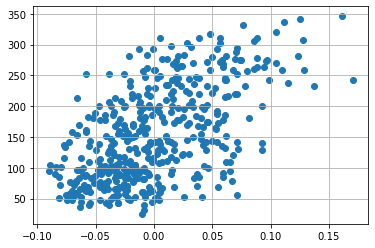

In [25]:
plt.scatter(X, y)
plt.grid()
plt.show()

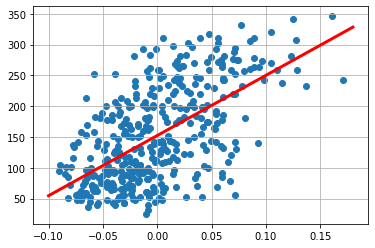

In [24]:
w, b = lr.coef_, lr.intercept_
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.18], [-0.1 * w + b, 0.18 * w + b], 'r', lw = 3)
plt.grid()
plt.show()

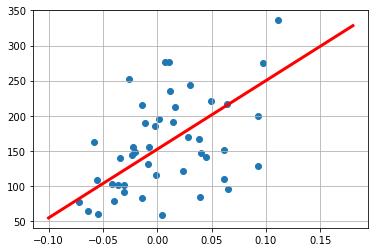

In [28]:
plt.scatter(X_test, y_test)
plt.plot([-0.1, 0.18], [-0.1 * w + b, 0.18 * w + b], 'r', lw = 3)
plt.grid()
plt.show()

### - Diabetes vs Blood Pressure

In [29]:
X, y = df.bp.values.reshape(-1, 1), diabetes.target
X.shape, y.shape

((442, 1), (442,))

In [30]:
lr = LinearRegression()
lr.fit(X, y)
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(714.7416437042881, 152.13348416289585, 2110153.507189273)

In [31]:
lr.score(X, y)

0.19490798886682947

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 2021
)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([162.01608587, 122.26509252, 157.0472117 , 124.7495296 ,
       109.84290709, 117.29621835, 171.95383421, 181.89158254,
       147.10946336, 115.63992695, 160.35979447,  92.4518475 ,
       132.20284085, 142.14058919, 246.48694674, 147.10946336,
       122.26509252, 127.23396669, 176.92270838, 166.98496004,
        94.93628459, 181.89158254, 157.0472117 , 147.10946336,
       147.10946336, 206.73595339, 127.23396669, 164.50052295,
       226.61145006, 171.95383421, 179.40714546,  89.96741042,
        89.96741042, 109.84290709, 102.38959584, 139.65615211,
       149.59390045, 166.98496004, 147.10946336, 137.17171502,
       201.76707922, 201.76707922, 122.26509252, 162.01608587,
       157.0472117 ])

In [33]:
r2_score(y_test, pred)

0.22296036461624136

In [34]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3384.5528828725055, 58.17691022108776)

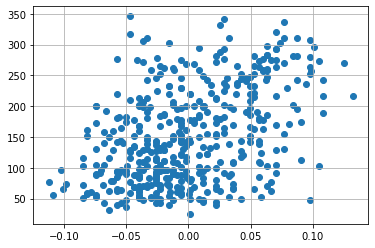

In [35]:
plt.scatter(X, y)
plt.grid()
plt.show()

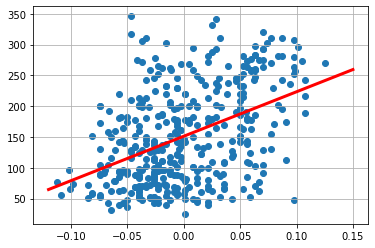

In [43]:
w, b = lr.coef_, lr.intercept_
plt.scatter(X_train, y_train)
plt.plot([-0.12, 0.15], [-0.12 * w + b, 0.15 * w + b], 'r', lw = 3)
plt.grid()
plt.show()

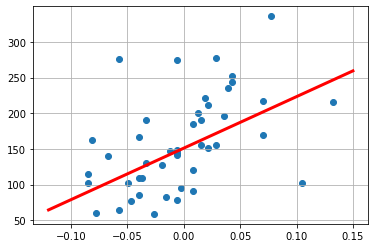

In [45]:
plt.scatter(X_test, y_test)
plt.plot([-0.12, 0.15], [-0.12 * w + b, 0.15 * w + b], 'r', lw = 3)
plt.grid()
plt.show()

### - Regression Sampling

In [46]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, random_state = 2021)

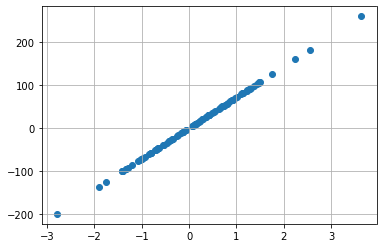

In [47]:
plt.scatter(X, y)
plt.grid()
plt.show()

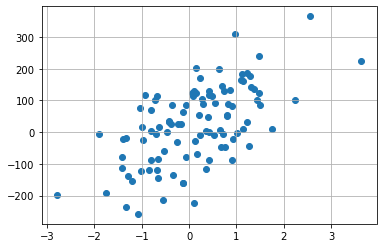

In [49]:
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1,
                        random_state = 2021, noise = 100, bias = 10)
plt.scatter(X, y)
plt.grid()
plt.show()

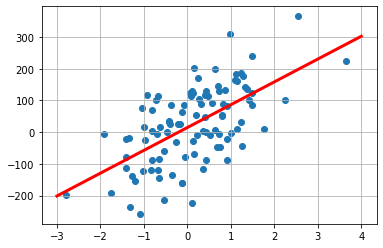

In [50]:
lr = LinearRegression()
lr.fit(X, y)
w, b = lr.coef_[0], lr.intercept_

plt.scatter(X, y)
plt.plot([-3, 4], [-3 * w + b, 4 * w + b], 'r', lw = 3)
plt.grid()
plt.show()

In [51]:
r2 = lr.score(X, y)
w, b, r2

(71.93719814461535, 14.538265236532116, 0.364424472577878)